In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
df=pd.read_csv(r"D:\vs\uncleaned_sales_data_500.csv")
print(df.head())
print(df.columns)

   Invoice_ID        Date  Customer_ID Product     Category  Quantity  \
0    33670850  2025-03-14         1013   Mouse  Accessories       3.0   
1    68709822  2025-05-20         1079   Mouse  Accessories       4.0   
2    45539473  2024-12-09         1040     NaN  Electronics       3.0   
3    58107768  2025-03-05         1094  Tablet  Electronics       5.0   
4    54355972  2024-11-26         1002  Laptop  Electronics       5.0   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         Online     New York  
1      196.45        785.80           Cash  Los Angeles  
2       86.80        260.40    Credit Card      Chicago  
3      442.68       2213.40         Online  Los Angeles  
4      607.62       3038.10         Online          NaN  
Index(['Invoice_ID', 'Date', 'Customer_ID', 'Product', 'Category', 'Quantity',
       'Unit_Price', 'Total_Amount', 'Payment_Method', 'City'],
      dtype='object')


In [3]:
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product           19
Category           0
Quantity          76
Unit_Price        76
Total_Amount      76
Payment_Method    95
City              76
dtype: int64


In [4]:
df["Product"]=df.groupby("Category")["Product"].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product            0
Category           0
Quantity          76
Unit_Price        76
Total_Amount      76
Payment_Method    95
City              76
dtype: int64


In [5]:
df["Quantity"]=df.groupby("Product")["Quantity"].transform(lambda x : x.fillna(x.mode()[0])if not x.mode().empty else x)
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product            0
Category           0
Quantity           0
Unit_Price        76
Total_Amount      76
Payment_Method    95
City              76
dtype: int64


In [6]:
print(df.head())

   Invoice_ID        Date  Customer_ID Product     Category  Quantity  \
0    33670850  2025-03-14         1013   Mouse  Accessories       3.0   
1    68709822  2025-05-20         1079   Mouse  Accessories       4.0   
2    45539473  2024-12-09         1040  Tablet  Electronics       3.0   
3    58107768  2025-03-05         1094  Tablet  Electronics       5.0   
4    54355972  2024-11-26         1002  Laptop  Electronics       5.0   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         Online     New York  
1      196.45        785.80           Cash  Los Angeles  
2       86.80        260.40    Credit Card      Chicago  
3      442.68       2213.40         Online  Los Angeles  
4      607.62       3038.10         Online          NaN  


In [7]:
df["Unit_Price"]=df.groupby("Product")["Unit_Price"].transform(lambda x: x.fillna(x.median())if not x.median() is np.nan else x)
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product            0
Category           0
Quantity           0
Unit_Price         0
Total_Amount      76
Payment_Method    95
City              76
dtype: int64


In [8]:
df["Total_Amount"]=df["Quantity"]*df["Unit_Price"]
print(df[["Quantity", "Unit_Price","Total_Amount"]])

     Quantity  Unit_Price  Total_Amount
0         3.0       42.89        128.67
1         4.0      196.45        785.80
2         3.0       86.80        260.40
3         5.0      442.68       2213.40
4         5.0      607.62       3038.10
..        ...         ...           ...
495       1.0      387.76        387.76
496       4.0      450.88       1803.52
497       5.0      933.12       4665.60
498       3.0      234.87        704.61
499       5.0      756.35       3781.75

[500 rows x 3 columns]


In [9]:
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product            0
Category           0
Quantity           0
Unit_Price         0
Total_Amount       0
Payment_Method    95
City              76
dtype: int64


In [10]:
print(df["Payment_Method"].unique())

['Online' 'Cash' 'Credit Card' nan 'Debit Card']


In [11]:
df['Payment_Method'] = df['Payment_Method'].replace({
    'Credit-Card': 'Credit Card',
    'Debit-Card': 'Debit Card',
    'Online Payment': 'Online'
})
print(df["Payment_Method"].unique())

['Online' 'Cash' 'Credit Card' nan 'Debit Card']


In [13]:
df["Payment_Method"].fillna(df["Payment_Method"].mode()[0],inplace=True)

In [14]:
print(df["Payment_Method"].unique())

['Online' 'Cash' 'Credit Card' 'Debit Card']


In [15]:
print(df.isnull().sum())

Invoice_ID         0
Date               0
Customer_ID        0
Product            0
Category           0
Quantity           0
Unit_Price         0
Total_Amount       0
Payment_Method     0
City              76
dtype: int64


In [16]:
print(df["City"].isnull().sum())

76


In [17]:
df["City"]=df.groupby("Customer_ID")["City"].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else x)
print(df.isnull().sum())

Invoice_ID        0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Unit_Price        0
Total_Amount      0
Payment_Method    0
City              0
dtype: int64


In [18]:
print(df["Category"].unique())

['Accessories' 'Electronics' 'Furniture' 'accessories' 'Accesories'
 'ACCessories']


In [19]:
df["Category"]=df["Category"].str.lower()


In [20]:
df["Category"] = df["Category"].str.lower()
df["Category"] = df["Category"].replace({
    "accessories": "Accessories",
    "accesories": "Accessories",
    "accesory": "Accessories",
    "accersories": "Accessories",
})
df["Category"] = df["Category"].str.title()
print(df["Category"].unique())


['Accessories' 'Electronics' 'Furniture']


In [21]:
print(df["City"].unique())

['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix']


In [22]:
df["Date"]=pd.to_datetime(df["Date"])
print(df["Date"].dtype)

datetime64[ns]


In [23]:
print(df["Payment_Method"].unique())
df["Payment_Method"]=df["Payment_Method"].str.upper()

['Online' 'Cash' 'Credit Card' 'Debit Card']


In [24]:
print(df["Product"].unique())

['Mouse' 'Tablet' 'Laptop' 'Headphones' 'Keyboard' 'Chair' 'Smartphone'
 'Desk' 'Shelf']


In [25]:
print(df.head())

   Invoice_ID       Date  Customer_ID Product     Category  Quantity  \
0    33670850 2025-03-14         1013   Mouse  Accessories       3.0   
1    68709822 2025-05-20         1079   Mouse  Accessories       4.0   
2    45539473 2024-12-09         1040  Tablet  Electronics       3.0   
3    58107768 2025-03-05         1094  Tablet  Electronics       5.0   
4    54355972 2024-11-26         1002  Laptop  Electronics       5.0   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         ONLINE     New York  
1      196.45        785.80           CASH  Los Angeles  
2       86.80        260.40    CREDIT CARD      Chicago  
3      442.68       2213.40         ONLINE  Los Angeles  
4      607.62       3038.10         ONLINE  Los Angeles  


In [26]:
df["Quantity"]=df["Quantity"].astype(int)
print(df.head())

   Invoice_ID       Date  Customer_ID Product     Category  Quantity  \
0    33670850 2025-03-14         1013   Mouse  Accessories         3   
1    68709822 2025-05-20         1079   Mouse  Accessories         4   
2    45539473 2024-12-09         1040  Tablet  Electronics         3   
3    58107768 2025-03-05         1094  Tablet  Electronics         5   
4    54355972 2024-11-26         1002  Laptop  Electronics         5   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         ONLINE     New York  
1      196.45        785.80           CASH  Los Angeles  
2       86.80        260.40    CREDIT CARD      Chicago  
3      442.68       2213.40         ONLINE  Los Angeles  
4      607.62       3038.10         ONLINE  Los Angeles  


In [27]:
print(df.shape)

(500, 10)


In [28]:
print(df.describe())

         Invoice_ID                           Date  Customer_ID   Quantity  \
count  5.000000e+02                            500   500.000000  500.00000   
mean   5.056110e+07  2025-01-15 06:40:19.199999744  1050.046000    2.82800   
min    2.553560e+05            2024-07-20 00:00:00  1000.000000    1.00000   
25%    2.721561e+07            2024-10-17 18:00:00  1025.000000    2.00000   
50%    4.964103e+07            2025-01-09 12:00:00  1049.000000    3.00000   
75%    7.669489e+07            2025-04-18 00:00:00  1076.000000    4.00000   
max    9.938037e+07            2025-07-19 00:00:00  1100.000000    5.00000   
std    2.894636e+07                            NaN    28.524993    1.35724   

       Unit_Price  Total_Amount  
count  500.000000    500.000000  
mean   505.783080   1447.351440  
min     11.740000     13.990000  
25%    296.220000    612.990000  
50%    492.590000   1113.440000  
75%    725.340000   1932.745000  
max    999.880000   4926.150000  
std    275.453416   1137.

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice_ID      500 non-null    int64         
 1   Date            500 non-null    datetime64[ns]
 2   Customer_ID     500 non-null    int64         
 3   Product         500 non-null    object        
 4   Category        500 non-null    object        
 5   Quantity        500 non-null    int64         
 6   Unit_Price      500 non-null    float64       
 7   Total_Amount    500 non-null    float64       
 8   Payment_Method  500 non-null    object        
 9   City            500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 39.2+ KB
None


In [30]:
print(df.columns)

Index(['Invoice_ID', 'Date', 'Customer_ID', 'Product', 'Category', 'Quantity',
       'Unit_Price', 'Total_Amount', 'Payment_Method', 'City'],
      dtype='object')


In [31]:
df["Product"]=df["Product"].str.title()
df["Payment_Method"]=df["Payment_Method"].str.title()
df["Category"]=df["Category"].str.title()
df["City"]=df["City"].str.title()
print(df.head())

   Invoice_ID       Date  Customer_ID Product     Category  Quantity  \
0    33670850 2025-03-14         1013   Mouse  Accessories         3   
1    68709822 2025-05-20         1079   Mouse  Accessories         4   
2    45539473 2024-12-09         1040  Tablet  Electronics         3   
3    58107768 2025-03-05         1094  Tablet  Electronics         5   
4    54355972 2024-11-26         1002  Laptop  Electronics         5   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         Online     New York  
1      196.45        785.80           Cash  Los Angeles  
2       86.80        260.40    Credit Card      Chicago  
3      442.68       2213.40         Online  Los Angeles  
4      607.62       3038.10         Online  Los Angeles  


In [32]:
top_product=df.groupby("Product")["Total_Amount"].sum().sort_values(ascending=False)
print(top_product)

Product
Tablet        101824.00
Chair         101171.79
Headphones     97874.62
Mouse          75451.90
Keyboard       75237.02
Laptop         72394.74
Shelf          70923.05
Smartphone     66825.03
Desk           61973.57
Name: Total_Amount, dtype: float64


In [33]:
top_product_name = top_product.idxmax()
top_product_sales = top_product.max()
print(f"The top-selling product is: {top_product_name} with total sales of ₹{top_product_sales:,.2f}")


The top-selling product is: Tablet with total sales of ₹101,824.00


In [34]:
print(df.head())

   Invoice_ID       Date  Customer_ID Product     Category  Quantity  \
0    33670850 2025-03-14         1013   Mouse  Accessories         3   
1    68709822 2025-05-20         1079   Mouse  Accessories         4   
2    45539473 2024-12-09         1040  Tablet  Electronics         3   
3    58107768 2025-03-05         1094  Tablet  Electronics         5   
4    54355972 2024-11-26         1002  Laptop  Electronics         5   

   Unit_Price  Total_Amount Payment_Method         City  
0       42.89        128.67         Online     New York  
1      196.45        785.80           Cash  Los Angeles  
2       86.80        260.40    Credit Card      Chicago  
3      442.68       2213.40         Online  Los Angeles  
4      607.62       3038.10         Online  Los Angeles  


In [35]:
print(df["City"].unique())

['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix']


In [36]:
print(df["Payment_Method"].unique())

['Online' 'Cash' 'Credit Card' 'Debit Card']


In [37]:
print(df["Product"].unique())

['Mouse' 'Tablet' 'Laptop' 'Headphones' 'Keyboard' 'Chair' 'Smartphone'
 'Desk' 'Shelf']


In [38]:
print(df["Category"].unique())

['Accessories' 'Electronics' 'Furniture']


In [55]:

print(df["Category"].unique())
category_sales = df.groupby('Category', as_index=False)['Total_Amount'].sum()
category_sales = category_sales.sort_values('Total_Amount', ascending=False)

fig1 = px.pie(
    category_sales,
    names='Category',
    values='Total_Amount',
    title='📂 Category-wise Sales Share',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig1.update_traces(
    textinfo='percent+label',
    pull=[0.05] * len(category_sales),
    marker=dict(line=dict(color='white', width=2))
)

fig1.update_layout(
    title_font=dict(size=22),
    title_x=0.5,
    showlegend=True,
    legend_title_text='Category',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig1.show()



['Accessories' 'Electronics' 'Furniture']


In [54]:
fig2 = px.treemap(
    df,
    path=['Category', 'Product'],
    values='Total_Amount',
    title='🧩 Sales Breakdown by Category and Product',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig2.update_traces(
    root_color='lightgray',
    hovertemplate='<b>%{label}</b><br>Total Sales: $%{value:,.2f}<extra></extra>',
    textinfo='label+value+percent entry'
)

fig2.update_layout(
    margin=dict(t=80, l=40, r=40, b=40),
    title_font=dict(size=22),
    title_x=0.5,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='Arial', size=14)
)

fig2.show()


In [57]:
product_sales = df.groupby('Product', as_index=False)['Total_Amount'].sum()
product_sales = product_sales.sort_values('Total_Amount', ascending=False)

fig3 = px.bar(
    product_sales,
    x='Product',
    y='Total_Amount',
    color='Product',
    title='🛒 Total Sales by Product',
    text=product_sales['Total_Amount'],
    labels={'Product': 'Product', 'Total_Amount': 'Total Sales ($)'}
)

fig3.update_traces(
    texttemplate='$%{text:.2f}',
    textposition='outside',
    marker=dict(line=dict(width=1, color='black'))
)

fig3.update_layout(
    xaxis_title='Product',
    yaxis_title='Total Sales ($)',
    title_font=dict(size=22),
    title_x=0.5,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    yaxis=dict(tickprefix='$', showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=False
)

fig3.show()



In [58]:
product_qty = df.groupby('Product', as_index=False)['Quantity'].sum()
product_qty = product_qty.sort_values('Quantity', ascending=False)

fig4 = px.bar(
    product_qty,
    x='Product',
    y='Quantity',
    color='Product',
    title='📦 Product Popularity by Quantity Sold',
    text=product_qty['Quantity'],
    labels={'Product': 'Product', 'Quantity': 'Units Sold'}
)

fig4.update_traces(
    texttemplate='%{text}',
    textposition='outside',
    marker=dict(line=dict(width=1, color='black'))
)

fig4.update_layout(
    xaxis_title='Product',
    yaxis_title='Units Sold',
    title_font=dict(size=22),
    title_x=0.5,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=False
)

fig4.show()


In [59]:
category_sales = df.groupby('Category', as_index=False)['Total_Amount'].sum()
category_sales = category_sales.sort_values('Total_Amount', ascending=False)
fig5 = px.bar(
    category_sales,
    x='Category',
    y='Total_Amount',
    color='Category',
    title='📦 Total Sales by Product Category',
    text=category_sales['Total_Amount'],
    labels={'Category': 'Product Category', 'Total_Amount': 'Total Sales ($)'}
)
fig5.update_traces(
    texttemplate='$%{text:.2f}',
    textposition='outside',
    marker=dict(line=dict(width=1, color='black'))
)
fig5.update_traces(width=0.4)
fig5.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Sales ($)',
    title_x=0.5,
    title_font=dict(size=22),
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    yaxis=dict(tickprefix='$', showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=False
)
fig5.show()



In [60]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month', as_index=False)['Total_Amount'].sum()
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales = monthly_sales.sort_values('Month')
fig6 = px.line(
    monthly_sales,
    x='Month',
    y='Total_Amount',
    markers=True,
    title='📊 Monthly Sales Trend Over Time',
    text=monthly_sales['Total_Amount'],
    labels={'Month': 'Month', 'Total_Amount': 'Total Sales ($)'}
)
fig6.update_traces(
    line=dict(color='royalblue', width=3),
    marker=dict(size=8, color='darkblue'),
    textposition='top center',
    hovertemplate='<b>Month:</b> %{x|%B %Y}<br><b>Total Sales:</b> $%{y:.2f}<extra></extra>'
)
fig6.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales ($)',
    title_font=dict(size=22),
    title_x=0.5,
    xaxis=dict(
        tickformat='%b %Y',
        showgrid=True,
        tickangle=45
    ),
    yaxis=dict(
        showgrid=True,
        tickprefix='$',
        ticksuffix='',
        gridcolor='lightgray'
    ),
    plot_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80)
)
fig6.show()


In [62]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').astype(str)
monthly_category = df.groupby(['Month', 'Category'])['Total_Amount'].sum().reset_index()
monthly_category['Month'] = pd.to_datetime(monthly_category['Month'])
monthly_category = monthly_category.sort_values('Month')

fig7 = px.bar(
    monthly_category,
    x='Month',
    y='Total_Amount',
    color='Category',
    barmode='group',
    title='📆 Monthly Sales by Category',
    labels={'Month': 'Month', 'Total_Amount': 'Total Sales ($)'}
)

fig7.update_layout(
    xaxis=dict(
        tickformat='%b %Y',
        tickangle=45,
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickprefix='$',
        showgrid=True,
        gridcolor='lightgray'
    ),
    title_font=dict(size=22),
    title_x=0.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80)
)

fig7.show()


In [63]:
city_sales = df.groupby('City', as_index=False)['Total_Amount'].sum()
city_sales = city_sales.sort_values(by='Total_Amount', ascending=False)

fig8 = px.bar(
    city_sales,
    x='City',
    y='Total_Amount',
    color='City',
    title='🌆 Top Cities by Total Sales',
    text=city_sales['Total_Amount'],
    labels={'City': 'City', 'Total_Amount': 'Total Sales ($)'}
)

fig8.update_traces(
    texttemplate='$%{text:.2f}',
    textposition='outside',
    marker=dict(line=dict(width=1, color='black'))
)
fig8.update_traces(width=0.4)
fig8.update_layout(
    xaxis_title='City',
    yaxis_title='Total Sales ($)',
    title_font=dict(size=22),
    title_x=0.5,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    yaxis=dict(tickprefix='$', showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=False
)

fig8.show()


In [64]:
payment_counts = df['Payment_Method'].value_counts().reset_index()
payment_counts.columns = ['Payment_Method', 'Count']
fig9 = px.pie(
    payment_counts,
    names='Payment_Method',
    values='Count',
    title='💳 Payment Method Usage Share',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig9.update_traces(
    textinfo='percent+label',
    pull=[0.05]*len(payment_counts),
    marker=dict(line=dict(color='white', width=2))
)

fig9.update_layout(
    title_font=dict(size=22),
    title_x=0.5,
    showlegend=True,
    legend_title_text='Payment Method',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig9.show()


In [65]:
top_customers = df.groupby('Customer_ID', as_index=False)['Total_Amount'].sum()
top_customers = top_customers.sort_values('Total_Amount', ascending=False).head(10)

fig10 = px.bar(
    top_customers,
    x='Customer_ID',
    y='Total_Amount',
    color='Customer_ID',
    title='👤 Top 10 Customers by Spending',
    text=top_customers['Total_Amount'],
    labels={'Customer_ID': 'Customer ID', 'Total_Amount': 'Total Sales ($)'}
)

fig10.update_traces(
    texttemplate='$%{text:.2f}',
    textposition='outside',
    marker=dict(line=dict(width=1, color='black'))
)

fig10.update_layout(
    xaxis_title='Customer ID',
    yaxis_title='Total Sales ($)',
    title_font=dict(size=22),
    title_x=0.5,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    yaxis=dict(tickprefix='$', showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=False
)

fig10.show()


In [66]:
fig11 = px.scatter(
    df,
    x='Quantity',
    y='Unit_Price',
    color='Product',
    size='Total_Amount',
    hover_data=['Product', 'Category', 'City', 'Payment_Method'],
    title='📈 Unit Price vs Quantity',
    labels={'Quantity': 'Quantity Purchased', 'Unit_Price': 'Unit Price ($)'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig11.update_traces(
    marker=dict(line=dict(width=1, color='black')),
    selector=dict(mode='markers')
)

fig11.update_layout(
    title_font=dict(size=22),
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray', tickprefix='$'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=80, b=80),
    legend_title_text='Product'
)

fig11.show()


C:\Users\Sai prem\AppData\Local\Temp\ipykernel_13072\1054912238.py:20: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\Sai prem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



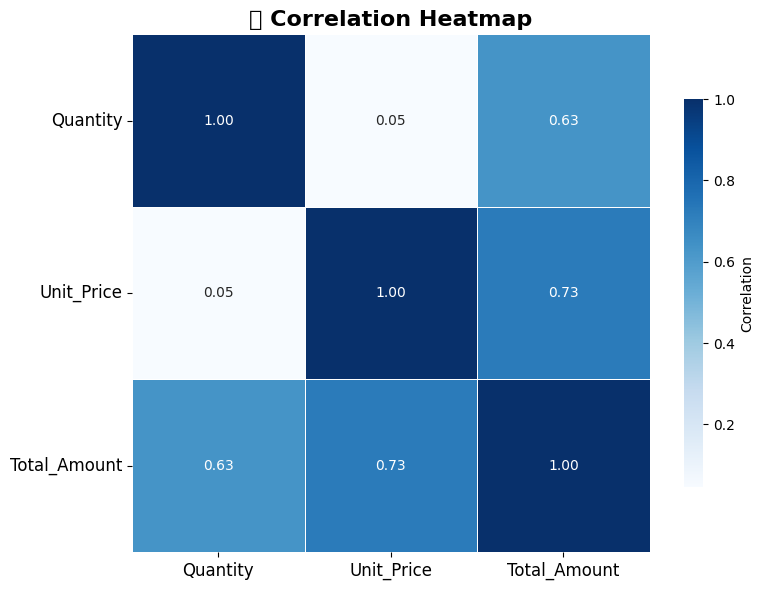

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
corr_matrix = df[['Quantity', 'Unit_Price', 'Total_Amount']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.75, 'label': 'Correlation'}
)

plt.title('📊 Correlation Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
